# Imports

In [11]:
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import scipy as sp
import tensorflow as tf
import keras
import tensorflow.keras
import sklearn as sk
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Versions

In [12]:
print(f"Python version: {sys.version}")
print(f"Tensor Flow Version: {tensorflow.__version__}")
print(f"Tensorflow Keras Version: {tensorflow.keras.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Scikit-Learn {sk.__version__}")

Python version: 3.7.11 (default, Jul 27 2021, 09:42:29) [MSC v.1916 64 bit (AMD64)]
Tensor Flow Version: 2.0.0
Tensorflow Keras Version: 2.2.4-tf
Keras Version: 2.3.1
Scikit-Learn 0.24.2


# Data Frame

In [13]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(URL, names = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'label'])
df.head(6)

,sepal_lenght,sepal_width,petal_lenght,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [14]:
label = pd.get_dummies(df['label'])
label

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [15]:
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)
df

,sepal_lenght,sepal_width,petal_lenght,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [16]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y = dataset[:, 4:].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Neural Network

In [17]:
numpy.random.seed(10)
tensorflow.random.set_seed(5)

model = Sequential([ Dense(5, activation='sigmoid', input_shape=(4,)), Dense(10, activation='sigmoid'), Dense(3, activation='sigmoid'), ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=2, epochs=100, validation_split=0.2)

Train on 89 samples, validate on 23 samples
Epoch 1/100
89/89 [==============================] - 0s 5ms/sample - loss: 1.1030 - accuracy: 0.3596 - val_loss: 1.1401 - val_accuracy: 0.3043
Epoch 2/100
89/89 [==============================] - 0s 371us/sample - loss: 1.0988 - accuracy: 0.3596 - val_loss: 1.1331 - val_accuracy: 0.3043
Epoch 3/100
89/89 [==============================] - 0s 393us/sample - loss: 1.0955 - accuracy: 0.3596 - val_loss: 1.1276 - val_accuracy: 0.3043
Epoch 4/100
89/89 [==============================] - 0s 371us/sample - loss: 1.0925 - accuracy: 0.3596 - val_loss: 1.1217 - val_accuracy: 0.3043
Epoch 5/100
89/89 [==============================] - 0s 382us/sample - loss: 1.0905 - accuracy: 0.3596 - val_loss: 1.1185 - val_accuracy: 0.3043
Epoch 6/100
89/89 [==============================] - 0s 371us/sample - loss: 1.0875 - accuracy: 0.3596 - val_loss: 1.1122 - val_accuracy: 0.3043
Epoch 7/100
89/89 [==============================] - 0s 371us/sample - loss: 1.0845 - ac

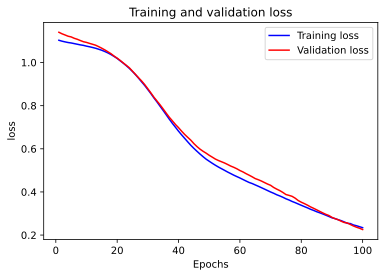

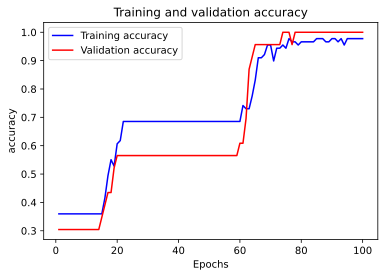

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'b-')
    plt.plot(epochs, val_metrics, 'r-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["Training "+metric, 'Validation '+metric])
    plt.show()

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [20]:
model.evaluate(x = X_test, y = Y_test)

38/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2529903885565306, 0.9736842]